<a href="https://colab.research.google.com/github/chris051091/Seminario-3/blob/master/preprocess/src/Testeo_Precipitaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes - Precipitación

In [31]:
import pandas as pd
import numpy as np
import os
import re
from functools import reduce

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'

# NOMBRE_ESTACION = 'chucuri'
# NOMBRE_ESTACION = 'palanquero'
NOMBRE_ESTACION = 'vizcaina'

PATH_FINAL_DADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/'
PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'

FILE_DATOS_PROCESADOS = NOMBRE_ESTACION.lower() + '_procesado_10min.csv'
FILE_DATOS_TRATADOS = NOMBRE_ESTACION.lower() + '_tratados_prec.csv'


In [33]:
df = pd.read_csv(PATH_FINAL_DADOS + FILE_DATOS_PROCESADOS, 
                 sep = ';', 
                 parse_dates = ["FECHA"],
                 date_parser = lambda col: pd.to_datetime(col)
                )

dfVar = df[['FECHA', 'PREC']].copy()
dfVar = dfVar.sort_values(by=['FECHA']).reset_index(drop = True)

# Eliminando datos que no fueron tomados cada 10 min.
# Para chucuri fueron 4 datos

dfVar = dfVar[dfVar['FECHA'].dt.minute % 10 == 0].reset_index(drop = True)
dfVar

,FECHA,PREC
0,2011-01-01 00:10:00-05:00,0.0
1,2011-01-01 00:20:00-05:00,0.0
2,2011-01-01 00:30:00-05:00,0.0
3,2011-01-01 00:40:00-05:00,0.0
4,2011-01-01 00:50:00-05:00,0.0
...,...,...
312925,2017-12-31 23:10:00-05:00,0.0
312926,2017-12-31 23:20:00-05:00,0.0
312927,2017-12-31 23:30:00-05:00,0.0
312928,2017-12-31 23:40:00-05:00,0.0


## Test de rango fijo

In [34]:
prec_max = 100.
prec_min = 0.

lamb_func = lambda r: np.nan if ((r > prec_max) | (r < prec_min)) else r

dfVar['PREC_RANGO_FIJO'] = dfVar['PREC'].apply(lamb_func)
dfVar

,FECHA,PREC,PREC_RANGO_FIJO
0,2011-01-01 00:10:00-05:00,0.0,0.0
1,2011-01-01 00:20:00-05:00,0.0,0.0
2,2011-01-01 00:30:00-05:00,0.0,0.0
3,2011-01-01 00:40:00-05:00,0.0,0.0
4,2011-01-01 00:50:00-05:00,0.0,0.0
...,...,...,...
312925,2017-12-31 23:10:00-05:00,0.0,0.0
312926,2017-12-31 23:20:00-05:00,0.0,0.0
312927,2017-12-31 23:30:00-05:00,0.0,0.0
312928,2017-12-31 23:40:00-05:00,0.0,0.0


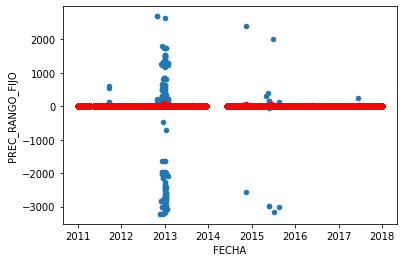

In [35]:
ax = dfVar.plot(kind = 'scatter', x='FECHA', y='PREC')
dfVar.plot(kind = 'scatter', x='FECHA', y='PREC_RANGO_FIJO', ax=ax, color='red')

In [36]:
## Para filtrar los valores finales
dfFinal = dfVar[~dfVar['PREC_RANGO_FIJO'].isnull()].reset_index(drop=True)
dfFinal

,FECHA,PREC,PREC_RANGO_FIJO
0,2011-01-01 00:10:00-05:00,0.0,0.0
1,2011-01-01 00:20:00-05:00,0.0,0.0
2,2011-01-01 00:30:00-05:00,0.0,0.0
3,2011-01-01 00:40:00-05:00,0.0,0.0
4,2011-01-01 00:50:00-05:00,0.0,0.0
...,...,...,...
307957,2017-12-31 23:10:00-05:00,0.0,0.0
307958,2017-12-31 23:20:00-05:00,0.0,0.0
307959,2017-12-31 23:30:00-05:00,0.0,0.0
307960,2017-12-31 23:40:00-05:00,0.0,0.0


In [37]:
print(f'Datos iniciales : {dfVar.shape[0]}')
print(f'Datos nulos iniciales : {dfVar[dfVar["PREC"].isnull()].shape[0]}')
print(f'Datos nulos después de los testes : {dfFinal[dfFinal["PREC_RANGO_FIJO"].isnull()].shape[0]}')
print(f'Datos finales después de testes : {dfFinal.shape[0]}')
print(f'Datos no nulos que fueron eliminados en los testes : {dfVar.shape[0] - dfFinal.shape[0] - dfVar[dfVar["PREC"].isnull()].shape[0]}')

Datos iniciales : 312930
Datos nulos iniciales : 4629
Datos nulos después de los testes : 0
Datos finales después de testes : 307962
Datos no nulos que fueron eliminados en los testes : 339


In [38]:
(dfFinal[['FECHA', 'PREC_RANGO_FIJO']]
          .rename(columns = {'PREC_RANGO_FIJO' : 'PREC'})
          .to_csv(PATH_FINAL_DADOS_TRATADOS + FILE_DATOS_TRATADOS, header=True, index=False, sep = ';'))